<a href="https://colab.research.google.com/github/pigandfrog/NewYork_311_Noise/blob/master/311Calls_and_noise_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


The data is 311 calls from New York City for the year 2017.  I had pre-filtered them on the website so that they only contain calls that have to do with noise distrubances.

In [0]:
# Bringing in the pieces of the dataFrame.  I had broken the dataFrame up
# so that it would be able to fit the whole data on github.

url_1 = "https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_first.csv"
url_2 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_second.csv'
url_3 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_third.csv'
url_4 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_fourth.csv'
url_5 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_fifth.csv'
url_6 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_six.csv'
url_7 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_seventh.csv'
url_8 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_eighth.csv'
url_9 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_ninth.csv'
url_10 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_tenth.csv'
url_11 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_eleventh.csv'
url_12 = 'https://raw.githubusercontent.com/pigandfrog/NewYork_311_Noise/master/NewYorkNoise2017_twelve.csv'

In [0]:
# The are the columns that I will read in. Thus dropping some of the columns before reading in the dataFrame.
columns_to_use = ['Created Date', 'Complaint Type', 'Descriptor', 'Location Type', 'Incident Address']  
numerical_col_to_use = [1, 5, 6, 7, 9]

In [0]:
# Putting all the urls into a list except for the first url.
# Used to read in all the dataFrames
url_List = [url_2, url_3, url_4, url_5, url_6, url_7, url_8, url_9, url_10, url_11, url_12]

In [0]:
df_1 = pd.read_csv(url_1, usecols=columns_to_use)

In [0]:
# Putting the urls into a list to read them into a dataframes
# Will return a list of the dataframes
def readUrl_for_dataframes(url_List):
  theList = []
  for i in url_List:
    d = pd.read_csv(i, header=None, usecols=numerical_col_to_use)
    d.columns = columns_to_use
    theList.append(d)
  return theList

In [0]:
# Function for putting the dataFrame together.  For just one complete dataFrame
def concatData(dataFrameList, firstDataFrame):
  for i in dataFrameList:
    firstDataFrame  = pd.concat([firstDataFrame, i],ignore_index=True)
  return firstDataFrame

In [0]:
# Building the dataFrame into a single dataFrame
dataFrameList = readUrl_for_dataframes(url_List)

df = concatData(dataFrameList, df_1)


In [110]:
print(df.shape)
df.head(2)

(448309, 5)


,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
0,12/31/2016 12:00:17 AM,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,964 MCDONALD AVENUE
1,12/31/2016 12:00:50 AM,Noise - Residential,Loud Music/Party,Residential Building/House,99 ALLEN STREET


In [111]:
# Checking to see what are the null values
df.isnull().sum()

Created Date            0
Complaint Type          0
Descriptor              0
Location Type       60251
Incident Address    50574
dtype: int64

In [112]:
# Trying to see what I want to do with the null values in the Location Type
# Filtering the data where all the Location Type is NULL
locationTypeNull = df[df['Location Type'].isna()]
print(locationTypeNull.head())
print("The number of NAN that are in \"Incident Address\" in LocationTypeNull is \n", 
      locationTypeNull['Incident Address'].isnull().sum(),"  The number of entries in the LocationTypeNull is ",
      len(locationTypeNull.index) )

               Created Date Complaint Type  ... Location Type       Incident Address
22   12/31/2016 12:09:00 AM          Noise  ...           NaN  43-10 CRESCENT STREET
23   12/31/2016 12:10:00 AM          Noise  ...           NaN          2315 BROADWAY
47   12/31/2016 12:20:00 AM          Noise  ...           NaN      53 MASPETH AVENUE
100  12/31/2016 12:48:00 AM          Noise  ...           NaN     437 BLEEKER STREET
139  12/31/2016 01:07:00 AM          Noise  ...           NaN                    NaN

[5 rows x 5 columns]
The number of NAN that are in "Incident Address" in LocationTypeNull is 
 13283   The number of entries in the LocationTypeNull is  60251


In [113]:
# Looking for the dates that are still present in the filtered dataSet
locationTypeNull['Created Date'].value_counts()

09/23/2017 09:25:00 AM    21
09/23/2017 10:41:00 AM    17
05/25/2017 09:21:00 AM    15
09/23/2017 09:24:00 AM    14
09/23/2017 10:40:00 AM    11
                          ..
07/13/2017 05:32:00 AM     1
05/05/2017 10:05:00 PM     1
12/22/2017 06:36:00 PM     1
06/01/2017 10:50:00 PM     1
12/28/2017 01:23:00 PM     1
Name: Created Date, Length: 54587, dtype: int64

In [114]:
# Checking the dtypes of the colums.  I will want the first column in date format
df.dtypes

Created Date        object
Complaint Type      object
Descriptor          object
Location Type       object
Incident Address    object
dtype: object

In [0]:
# Changing the "created date" to a date format
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [116]:
print(df['Created Date'].dtypes)
df['Created Date'].sample(5)

datetime64[ns]


126217   2017-05-01 00:12:12
174294   2017-06-03 22:34:17
410732   2017-11-20 18:59:00
146075   2017-05-17 17:38:05
194470   2017-06-16 23:03:30
Name: Created Date, dtype: datetime64[ns]

In [117]:

df['Location Type'].value_counts(dropna=False)

Residential Building/House    230954
Street/Sidewalk               102667
NaN                            60251
Store/Commercial               25888
Club/Bar/Restaurant            21664
Park/Playground                 4678
Above Address                   1063
House of Worship                 907
Sidewalk                         237
Name: Location Type, dtype: int64

In [118]:
# Checking the types of values that are present in 
# "Complaint Type".
df['Complaint Type'].value_counts(dropna=False)

Noise - Residential         230954
Noise - Street/Sidewalk      73210
Noise                        60251
Noise - Commercial           47552
Noise - Vehicle              29457
Noise - Park                  4678
Noise - Helicopter            1063
Noise - House of Worship       907
Collection Truck Noise         237
Name: Complaint Type, dtype: int64

In [119]:
# Checking the type of values from the "Descriptor" type
print("Number of values: ", len(df['Descriptor'].value_counts()), "\n")
df['Descriptor'].value_counts(dropna=False)

Number of values:  26 



Loud Music/Party                                         243008
Banging/Pounding                                          66450
Loud Talking                                              41736
Noise: Construction Before/After Hours (NM1)              27324
Car/Truck Music                                           16695
Noise: Construction Equipment (NC1)                        9149
Car/Truck Horn                                             7376
Engine Idling                                              7351
Noise, Barking Dog (NR5)                                   6916
Noise: air condition/ventilation equipment (NV1)           4769
Loud Television                                            4142
Noise: Alarms (NR3)                                        4044
Noise: Jack Hammering (NC2)                                3852
Noise, Ice Cream Truck (NR4)                               1524
Noise: Private Carting Noise (NQ1)                         1364
Other                                   

In [0]:
# Creating a copy of the dataFrame
noise = df.copy()

# What is the most noisy month in New York City?


In [0]:
# Creating a function that will return a list that will be a list of tuples.
# The tuples will be index 0: dataframe of Month, index 1: string of the Month.
def byMonth(df):
  tList = [] # the list that will contain the tuples
  month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
           'August', 'September', 'October', 'November', 'December']
  
  for i in range(1,13):
    
    tList.append((noise[noise['Created Date'].dt.month == i], month[i-1]))
  return tList
  

In [0]:
# List of dataFrames by month
# Decided to put both of the dataframes and months in two separate lists
# in preparation for visulalization
monthList = byMonth(noise)

length_of_data_by_month = []
data_by_month = []
theMonthNames = []

# Building three different lists that contain the will the 
# length_of_data_by_month
# data_by_month in list
# theMonthnames

for i in range(12):
  length_of_data_by_month.append(len(monthList[i][0]))
  data_by_month.append(monthList[i][0])
  theMonthNames.append(monthList[i][1])


In [123]:
noise.head(1)

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
0,2016-12-31 00:00:17,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,964 MCDONALD AVENUE


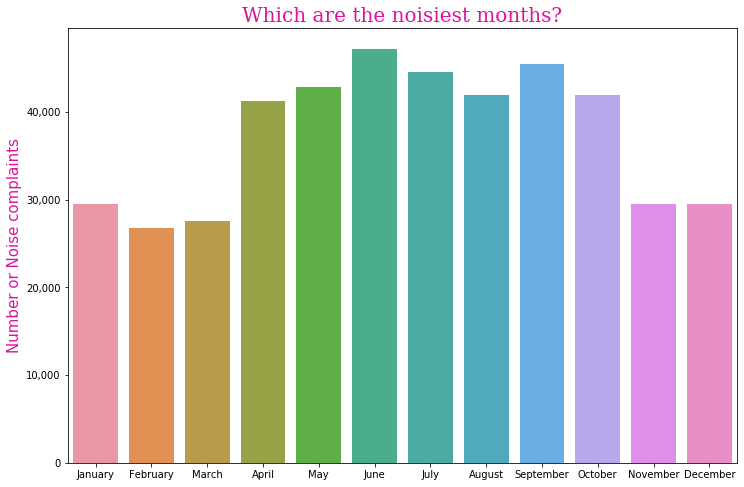

In [124]:
# What are the Noisiest months

# This is the fontdictionary that I am using in this project
myfontdict = {'family': 'serif', 'color':'#de129d', 'size':'20'}


plotFont = {'color': 'hotpink', 'size': '15'}
plt.figure(figsize=(12,8))
plt.ylabel("Number or Noise complaints", fontdict={"color":"#de129d", 'size':15})

# Putting a comma in the ylabel



plt.title("Which are the noisiest months?", fontdict=myfontdict)
theAx = sns.barplot(theMonthNames, length_of_data_by_month )

theAx.set_yticklabels([ '0', '10,000', '20,000','30,000', '40,000' ]);



# What are the most common causes of the noise distubances

In [0]:
# This is an inner function that will be used to help set the state in the mostCommonCause function
# Will return a tuple of the searchLabel and number
def setUp(tSearchBy, theType):
  
  searchLabel = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
           'August', 'September', 'October', 'November', 'December']
  number = [0,1,2,3,4,5,6,7,8,9,10,11]

  if theType != 'month':
    searchLabel = ['12 a.m.', '1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
                   '12 p.m.', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.']
    if tSearchBy == 'all':
      number = [0,1,2,3,4,5,6,7,8,9,10,11, 12, 13,14,15,16,17,18,19,20,21,22,23]
    else:
      tSearchBy = np.array(tSearchBy)
      number = (tSearchBy - 1)
  elif tSearchBy != 'all':
    tSearchBy = np.array(tSearchBy)
    number = (tSearchBy -1)
  return searchLabel, number

In [0]:
# This is an inner function that will be used to get the specific descriptors wanted
# This method is only called when there are specific descriptors wanted.
def getSpecificDescriptors(dataFrameList, searchLabel, number, descriptorsWanted):
  '''
    dataFrameList:   the data.  Can be multiple dataFrames in a list format for months or for hours.

    searchLabel:  these are the labels either the hours of the day or months in a year.

    number:   These are the numbers that correspond to the numbers of months or hours of day.

    descriptorsWanted:  This is a list of strings that are the descriptors that are wanted.

    returns:  Will return a list of Tuples in a similar format as the mostCommonCause method.
   '''
  theListToReturn = []
  
  for i in number:
    descriptorStr = []
    descriptorVal = []
    #Looking for the values for the descriptors in each months or hour
    # this is the format for searching: len(month_by_hour[5][0][month_by_hour[5][0]['Descriptor'] == "Loud Music/Party" ])
    for j in range(len(descriptorsWanted)):
      descriptorStr.append(descriptorsWanted[j])
      descriptorVal.append(len(dataFrameList[i][dataFrameList[i]['Descriptor']== descriptorsWanted[j]]))

    theListToReturn.append((searchLabel[i], descriptorStr, descriptorVal))
  
  return theListToReturn

              

In [0]:
# Writing the function that will return the most common cause of noise disturbances in each month
# Returns a list of lists index 0 : is String Month Name","index 1 : string of Discriptor", index 2: "value")
# Made it to return different variables if wanted

def mostCommonCause(dataFrameList, searchBy='all', theType="month" ,ranksWanted='first', complaintType=False, locationType=False,
                    descriptorsWanted=None):
  '''dataFrameList :  the dataframes in a list
     searchBy:  can be either 'all' or also a list of integers that represent the months wanted.\n
                 Jan will be 1:  Feb will be 2:  If is hour integer list are hours all is 24 hours
     type:  type can be "month" or "hour"
     
     ranksWanted:  default will be the top rank.  Can get the ranks in a list ie [1,2,3]
                   if descriptorsWanted is used then rankWanted will be ignored.

     complaintType:  if set to True will also pack these values into the the tuple
                     When set to false will not use pack these values in the tuple.
     
     descriptorsWanted:   This is used to search for specific descriptors and return their value.
                          When this parameter is used the ranksWanted will be ignored.  LocationType and 
                          complaintType will be viewed as false.
     
    
     returns: Will return a list of of tuples.
              Each tuple will contain : [0]=="string" month name/hour name  [1] == "string" descriptor
              [2] == value  
              optional are  complaint string (if set to return it) and  complaint value
              also option is location of complaint (string) and location values  
                   '''
  mostCommon = []
  
  numRanks = [1]
  
  if ranksWanted != 'first':
    numRanks = ranksWanted
  # SearchLabel is the label of either months or hours
  # number is the correct number to coincide with the search type ie.  months(12 of them) or hours(24 of them).
  searchLabel , number =  setUp(searchBy, theType)

  # Checking to see if specific descriptors are wanted
  if descriptorsWanted != None:
    return getSpecificDescriptors(dataFrameList, searchLabel, number, descriptorsWanted)

  else:
    for i in range(len(number)): # Most outer loop -- loops through the months or the hours in the dataFrame
      j = number[i]
      # Getting the Series that contain the value_count()
      s = dataFrameList[j]['Descriptor'].value_counts()
      if complaintType == True:
        complaintSeries = dataFrameList[j]['Complaint Type'].value_counts()
      if locationType == True:
        locationSeries = dataFrameList[j]['Location Type'].value_counts()
      # Making the strings that will be put into the tuples
      theStringList = []
      theValueList = []
      complaintTypeString = []
      complaintTypeValues = []
      locationTypeString = []
      locationTypeValues = []
      valuesToPutInTuple = []
      # Running through the loops that will fill the lists for the tuples
      for k in range(len(numRanks)):
        rankNum = numRanks[k] -1
        # index of the value counts has the string descriptor
        if rankNum < (len(s.index)-1): 
          theStringList.append(s.index[rankNum])
          theValueList.append(s[rankNum])
        if complaintType == True and rankNum < (len(complaintSeries.index)-1):
          complaintTypeString.append(complaintSeries.index[rankNum])
          complaintTypeValues.append(complaintSeries[rankNum])
        if locationType == True and rankNum < (len(locationSeries.index)-1):
          locationTypeString.append(locationSeries.index[rankNum])
          locationTypeValues.append(locationSeries[rankNum])
      # Figuring how to make the tuple and load the lists
      if complaintType == True:
        if locationType == True:
          mostCommon.append((searchLabel[j],theStringList, theValueList, complaintTypeString, 
                          complaintTypeValues, locationTypeString, locationTypeValues)) 
        else:
          mostCommon.append((searchLabel[j],theStringList, theValueList, 
                          complaintTypeString, complaintTypeValues))
      elif locationType == True:
        mostCommon.append((searchLabel[j],theStringList, theValueList, locationTypeString, locationTypeValues))
        
      else:
        mostCommon.append((searchLabel[j],theStringList, theValueList))

  return mostCommon

In [0]:
#this is just a try
#theis 

In [129]:
# Getting the 3 most common causes of noise disturbances per month in the year 2017
# Returning the tuple with the complaint type and location type in included

the3MostCommon = mostCommonCause(data_by_month, ranksWanted=[1,2,3], complaintType=True, locationType=True)
the3MostCommon

[('January',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [14236, 6679, 2241],
  ['Noise - Residential', 'Noise', 'Noise - Commercial'],
  [17918, 4402, 3808],
  ['Residential Building/House', 'Street/Sidewalk', 'Store/Commercial'],
  [17918, 3181, 2087]),
 ('February',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [12616, 5633, 2180],
  ['Noise - Residential', 'Noise', 'Noise - Commercial'],
  [15452, 4343, 3258],
  ['Residential Building/House', 'Street/Sidewalk', 'Store/Commercial'],
  [15452, 3514, 1760]),
 ('March',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [12626, 6101, 2249],
  ['Noise - Residential', 'Noise', 'Noise - Commercial'],
  [16203, 4543, 3357],
  ['Residential Building/House', 'Street/Sidewalk', 'Store/Commercial'],
  [16203, 3324, 1850]),
 ('April',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [21215, 5898, 4195],
  ['Noise - Residential', 'Noise - Street/Sidewalk', 'Noise'],
  [20578, 6438, 6410],

In [0]:
# A method to unpack the tuple to get ready for ploting
# Will return a tuple of 3 lists (["string/month/hour"], [string/descriptor"],[values] )
# This tuple can also be used to get the location values out if extras is set to True.
# I will use this method again later to get the location values.  I have left the NAN values in the 
# location column and so some of the values ranks may be NAN.
def unpackTuples(mostCommonTuple, rank=1, wantExtras=False):
  '''rank:  the rank you want back. -- only one rank at a time can be used
     wantExtras:  if you are planning to unpack more the just
                  the first three items then set this to True 
    Returns:   Will return (month, descriptor, values) .... and also options to return
              a second descriptor(location) and the (location values) for that
      '''
  month = []
  descriptor = []
  values = []
  descriptor1 = []
  descriptor2 = []
  val1 = []
  val2 = []

 

  # Getting the length of the tuple to use in a for loop
  tupleLength = len(mostCommonTuple[0])

  for i in range(len(mostCommonTuple)):
    # the for loop for unpacking the tuple
    month.append(mostCommonTuple[i][0])
    
      
    
    if  (rank- 1) < len(mostCommonTuple[i][1]):
      descriptor.append(mostCommonTuple[i][1][rank-1])
      values.append(mostCommonTuple[i][2][rank-1])

    if tupleLength > 3 and (rank - 1) < len(mostCommonTuple[i][3]):
        descriptor1.append(mostCommonTuple[i][3][rank-1]) 
        val1.append(mostCommonTuple[i][4][rank-1])

    if tupleLength == 7 and (rank - 1) < len(mostCommonTuple[i][5]):
      descriptor2.append(mostCommonTuple[i][5][rank-1])
      val2.append(mostCommonTuple[i][6][rank-1])
      # deciding what to return
  if tupleLength == 7 and wantExtras == True:
    return month, descriptor, values, descriptor1, val1, descriptor2, val2
  elif tupleLength == 5 and wantExtras == True:
    return month, descriptor, values, descriptor1, val1
  else:
    return month, descriptor, values


In [131]:
# upacking the tuple to see the most common cause for noise
months, description, myVals = unpackTuples(the3MostCommon, rank=1)
# unpacking for the second most common cause of noise
months, descrption2, val2 = unpackTuples(the3MostCommon, rank=2)
# unpacking for the 3rd most common cause of noise complaints
months, description3, val3 = unpackTuples(the3MostCommon, rank=3)
print(months)
print(len(descrption2))

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
12


In [132]:
# Trying to make a dataFrame from this info to use a factorPlot
firstDf = pd.DataFrame({"Months": months, 'Most Common Disturbance':description, "Number of Times":myVals})
secondDf = pd.DataFrame({"Months":months, "Second Most Common Disturbance":descrption2, "Number of Times":val2})
thirdDf = pd.DataFrame({"Months":months, "Third Most Common Disturbance": description3, "Number of Times":val3})

newDf = pd.merge(firstDf, secondDf, how='outer', on=['Months'])
newDf = pd.merge(newDf, thirdDf, how='outer', on=["Months"])
newDf.head(15)

,Months,Most Common Disturbance,Number of Times_x,Second Most Common Disturbance,Number of Times_y,Third Most Common Disturbance,Number of Times
0,January,Loud Music/Party,14236,Banging/Pounding,6679,Loud Talking,2241
1,February,Loud Music/Party,12616,Banging/Pounding,5633,Loud Talking,2180
2,March,Loud Music/Party,12626,Banging/Pounding,6101,Loud Talking,2249
3,April,Loud Music/Party,21215,Banging/Pounding,5898,Loud Talking,4195
4,May,Loud Music/Party,23195,Banging/Pounding,5500,Loud Talking,4264
5,June,Loud Music/Party,28087,Loud Talking,4905,Banging/Pounding,4549
6,July,Loud Music/Party,28633,Banging/Pounding,4322,Loud Talking,3803
7,August,Loud Music/Party,25157,Banging/Pounding,4311,Loud Talking,4194
8,September,Loud Music/Party,26571,Banging/Pounding,4892,Loud Talking,4570
9,October,Loud Music/Party,21748,Banging/Pounding,6047,Loud Talking,4341


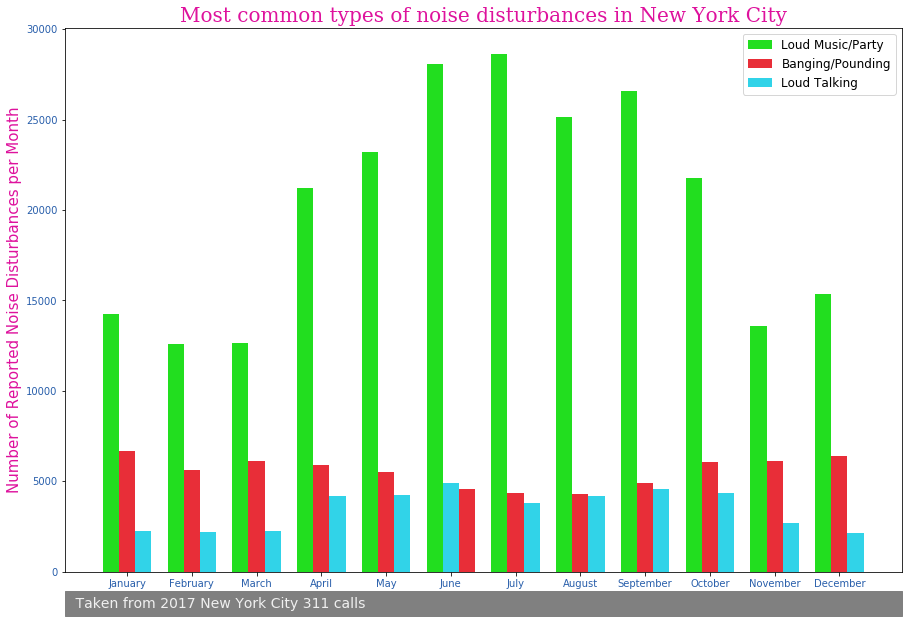

In [133]:
# Plotting the 3 most common occurrences per month
# Creating a hue for the  "Total Noise Occurances" so it will appear on the legend

myHue = ['Total Number of Noise Complaints'] * 12
fig , ax = plt.subplots(figsize=(15,10))
#plt.figure(figsize=(12, 10))

myfontdict = {'family': 'serif', 'color':'#de129d', 'size':'20'}

# Setting up the dictionary that has the colors for the labels
myColors = {"Banging/Pounding":"#e82e38", "Loud Music/Party":'#22de1f', 
            "Noise: Construction Before/After Hours (NM1)":'#2e47e8',
            "Loud Talking":"#31d3e8", "Noise: Construction Equipment (NC1)":"#cb4eed", 
            "Car/Truck Music":"#f5cf38" }


plt.title('Most common types of noise disturbances in New York City', fontdict=myfontdict);

ax.set_ylabel("Number of Reported Noise Disturbances per Month", fontdict={"color":"#de129d", 'size':15})
xVals = np.arange(12)

# Setting the x_ticks
ax.set_xticks(xVals)
ax.set_xticklabels(months, color='#295fab')




# Setting the bar width
barWidth = .25

#sns.barplot(theMonthNames, length_of_data_by_month, palette=['lightblue'] ,hue=myHue, )
#sns.barplot(months, myVals, hue=description, palette=['hotpink'] )
#sns.barplot(months, val2, hue=descrption2, palette=['brown', 'lightgreen'], dodge=True)
#sns.barplot(months, val3, hue=description3, palette=['lightgreen', 'brown'])
for i in range(12):
  p1 = ax.bar(xVals[i] - barWidth, myVals[i], width=barWidth, label =description[i], color=myColors[description[i]] )
  p2 = ax.bar(xVals[i], val2[i], width=barWidth, label=descrption2[i], color=myColors[descrption2[i]] )
  p3 = ax.bar(xVals[i] + barWidth, val3[i], width=barWidth, label=description3[i], color=myColors[description3[i]])


# Setting the color for the y labels
theYLabels = ax.get_yticklabels()
for label in theYLabels:
  label.set_color("#295fab")
 

# This is to remove the duplicate of the legends
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':12})

plt.text(x=-.87, y=-2000,  
         s=" Taken from 2017 New York City 311 calls                                                                                                                      ", 
         backgroundcolor = 'grey', color="#f0f0f0", size="14")

plt.show();





# Where is the noise coming from during each month?

In [0]:
# Pulling out all the info from the tuples that were created earlier with all the info about the noise in each month.
# I am going to use the location description and the location values to graph in a bar chart where the noise disturbances
# are happening.
theMonths1, descrip1, descripVal1, comp1, compVal1, locdescrip1, locVal1 = unpackTuples(the3MostCommon, wantExtras=True)
theMonths2, descrip2, descripVal2, comp2, compVal2, locdescrip2, locVal2 = unpackTuples(the3MostCommon, rank=2, wantExtras=True)
theMonths3, descrip3, descripVal3, comp3, compVal3, locdescrip3, locVal3 = unpackTuples(the3MostCommon, rank=3, wantExtras=True)


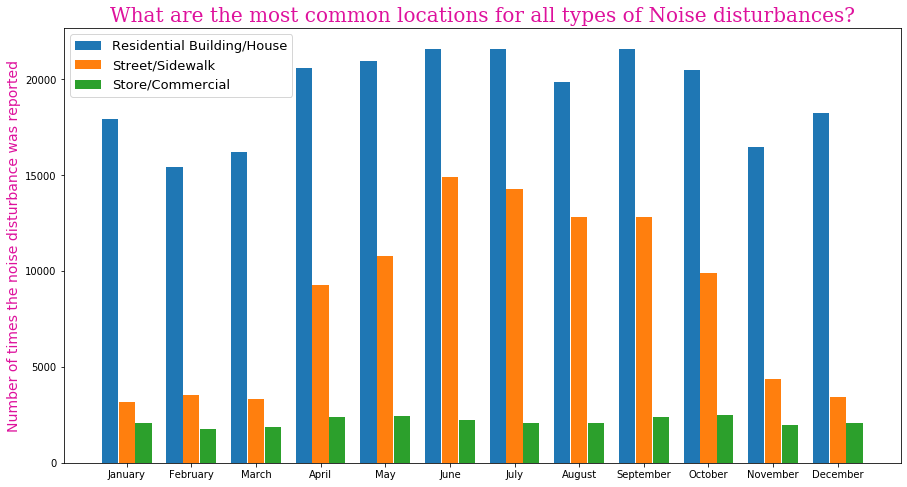

In [135]:
# Plotting the  3 Most common locations of the noise disturbances for each month

theYLabelFontDict = {"size": '14', 'color':"#de129d"}
fig, ax = plt.subplots(figsize=(15,8))

# Making the x values
xVals = np.arange(len(theMonths1))

# Setting the x and y ticks and labels
ax.set_xticks(xVals)
ax.set_xticklabels(theMonths1)


ax.set_ylabel("Number of times the noise disturbance was reported" , fontdict=theYLabelFontDict)

# This value is the complete width for each month.
theWidth = .25

# Setting the title of the graph
ax.set_title("What are the most common locations for all types of Noise disturbances?", fontdict=myfontdict)



rect1 = ax.bar(xVals - (theWidth+ theWidth/25), locVal1, theWidth, label='Residential Building/House' )
rect2 = ax.bar(xVals , locVal2, theWidth, label="Street/Sidewalk")
rect3 = ax.bar(xVals + (theWidth + theWidth/25), locVal3, theWidth, label="Store/Commercial")




# changing the size of font in the legend, so that can be better seen in the Medium article
ax.legend(prop={'size':13})
plt.show()





In [0]:
# Going to further filter the data of the months to just contain "Loud Music/Party".
# Will then look at where the Loud music and parties are occuring.

# data_by_month is a list of the data for each month filtered on each month
# will filter it also by 'Complaint Type' where the complaint is set as a Loud Music/Party
data_by_month

# List that will contain each months filtered info
month_filtered_by_LoudMusic = []

# Doing the filtering
for i in data_by_month:
  month_filtered_by_LoudMusic.append(i[i['Descriptor'] == "Loud Music/Party"])



In [137]:
noise.head(1)

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
0,2016-12-31 00:00:17,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,964 MCDONALD AVENUE


In [0]:
# Using a previously built method to find the ranks in the filtered list
compFiltered3mostCommon = mostCommonCause(month_filtered_by_LoudMusic, ranksWanted=[1,2,3], locationType=True, complaintType=True)

In [139]:
compFiltered3mostCommon
# The first two list are empty becuase we had filtered on this [Descriptor]

[('January',
  [],
  [],
  ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'],
  [10230, 2884, 1070],
  ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'],
  [10230, 1533, 1351]),
 ('February',
  [],
  [],
  ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'],
  [8785, 2444, 1315],
  ['Residential Building/House', 'Street/Sidewalk', 'Club/Bar/Restaurant'],
  [8785, 1315, 1286]),
 ('March',
  [],
  [],
  ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'],
  [8982, 2468, 1116],
  ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'],
  [8982, 1297, 1171]),
 ('April',
  [],
  [],
  ['Noise - Residential', 'Noise - Street/Sidewalk', 'Noise - Commercial'],
  [13220, 4379, 3372],
  ['Residential Building/House', 'Street/Sidewalk', 'Club/Bar/Restaurant'],
  [13220, 4379, 1817]),
 ('May',
  [],
  [],
  ['Noise - Residential', 'Noise - Street/Sidewalk', 'Noise - Commercial'],
  [14204, 53

In [0]:
# Unpacking the tuple to have the lists for each rank
theMonths, empty, empty2 , compStr1, compVal1, locStr1, locVal1 =  unpackTuples(compFiltered3mostCommon, rank=1, wantExtras=True)
theMonths, empty, empty2, compStr2, compVal2, locStr2, locVal2 = unpackTuples(compFiltered3mostCommon, rank=2, wantExtras=True)
theMonths, empty, empty2, compStr3, compVal3, locStr3, locVal3 = unpackTuples(compFiltered3mostCommon, rank=3, wantExtras=True)

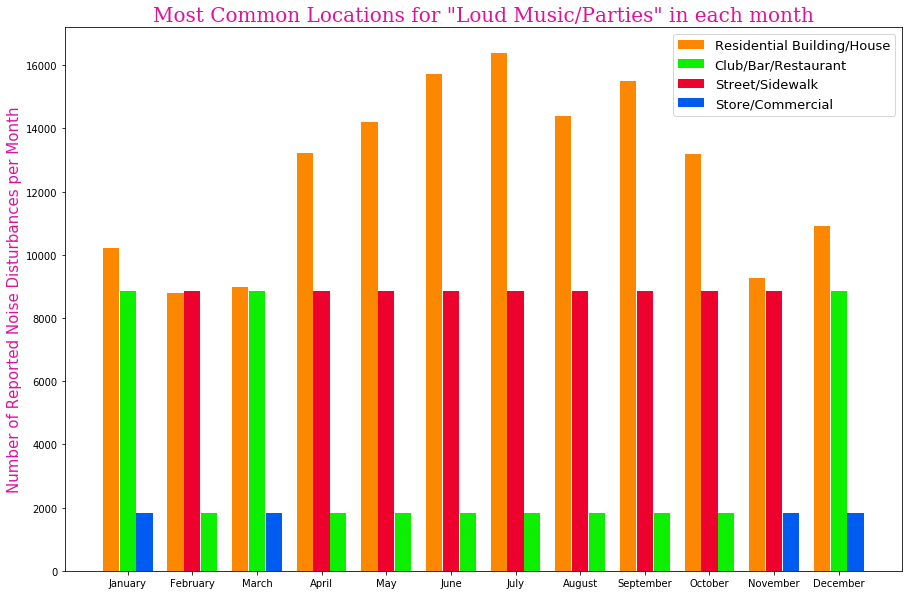

In [141]:
# Plotting the most common location for each month when the type of complaint is loud music / party


fig, ax = plt.subplots(figsize=(15,10))

ax.set_title("Most Common Locations for \"Loud Music/Parties\" in each month", fontdict=myfontdict)

# Setting the y Title
ax.set_ylabel("Number of Reported Noise Disturbances per Month", fontdict={"color":"#de129d", 'size':15})

# making the x ticks
xVals = np.arange(len(theMonths))

ax.set_xticks(xVals)
ax.set_xticklabels(theMonths)

theWidth = .25
theColors = {"Residential Building/House": "#fc8700", 'Club/Bar/Restaurant':"#0cf000", 'Store/Commercial':"#005cf0" , 'Street/Sidewalk':"#ed022d"}

# Making a list to contain the list of location strings so that we can then use this to plot
locStrings = [locStr1, locStr2, locStr3]

for i in range(len(theMonths)):
  mColor = theColors[locStr1[i]]
  ax.bar(xVals[i] - (theWidth + theWidth/25), locVal1[i], width=theWidth, color=mColor,label=locStr1[i])
for i in range(len(theMonths)):
  mColor = theColors[locStr2[i]]
  ax.bar(xVals[i] , locVal2, width=theWidth, color = mColor, label=locStr2[i])
for i in range(len(theMonths)):
  mColor = theColors[locStr3[i]]
  ax.bar(xVals[i] + (theWidth + theWidth/25), locVal3, width=theWidth, color=mColor, label=locStr3[i])

# This is to remove the duplicate of the legend 
# because when we turn it into a dictionary it can't have duplicate keys
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={"size":13}); # using properties to change the size to see better in the Medium article
  






# Would like to find out at what time of the day are certain noises disturbances happening.

In [142]:
data_by_month[0].head(1)

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
1068,2017-01-01 00:02:54,Noise - Residential,Loud Music/Party,Residential Building/House,255 79 STREET


In [0]:
# I  will choose to some of the months instead of all the months, just because it would be so much 
# different dataSets with each month.
# I will choose to look at this with the data filtered to type of the distubance being "Loud Music/Parties"
# and also for the dataFrame not filtered to just Loud Music/Parties.

# I will choose the months of January, July, December

# I am going to create a function that will do the following:
# Making the dataFrame that is broken up by hour in each month
# Will get a list for each month that contains a list for each hour of the day


# This is the inner Function takes in a dataFrame and then returns a list of the 
# data filterd by hour
def innerHourFunc(data):
  
  theList = []
  for i in range(24):
    theList.append(data[data["Created Date"].dt.hour == i])
  return theList


# This is another inner function that will return the month as a number 
# that can be used to access an index.
# January will return 0
def getTheMonth(theMonth):
  theMonths = {"January": 0, "February": 1, "March": 2, "April":3, "May":4,
               "June":5, "July":6, "August":7, "September":8, "October":9,
               "November":10, "December":11}
  return theMonths[theMonth]


def getDatabyHour(dataFrame, broken_by_month=True, month=None):
  ''' 
  dataFrame:  the dataFrame that is passed in

  broken_by_month:   Default is "True", which means that the dataFrame that is passed in, is a list
              that contains dataFrame filtered by each month.
              If it is set to "False", then it means just a dataFrame is passed in and not a list of the 
              data broken up by month.

  month:      default == None.  This parameteter can be used if 
              broken_by_month is True.  Can pass the name of a month to get back just the hour for the 
              month requested and not just all the months. The full name of the month will be passed in 
              as a string when requesting a specific month.
  
  Returns:    Will return a list of the data filtered by hour.
              If the data was passed in as a list by each month then a list where each element is a month
              will then hold a list for each hour in that month (list of lists).

  '''
  
  listToReturn =[]
  

  if broken_by_month == True:
    if month == None:
      for i in range(12):
        listToReturn.append(innerHourFunc(dataFrame[i]))
    else:
      listToReturn = innerHourFunc(dataFrame[getTheMonth(month)])
  else:
    listToReturn = innerHourFunc(dataFrame)
  return listToReturn

In [0]:
# Filtering by the hour on two month by month lists of dataFrames, where one dataSet has been pre-filtered where
# the type of noise is "LoudMusic/Parties", and the other one is just broken up by months 
month_by_hour_preFiltered_LoudMusic = getDatabyHour(month_filtered_by_LoudMusic, broken_by_month=True)
month_by_hour = getDatabyHour(data_by_month, broken_by_month=True)

In [0]:
january_by_hour = mostCommonCause(month_by_hour_preFiltered_LoudMusic[0], searchBy='all', theType='hour', ranksWanted=[1,2,3], locationType=True, complaintType=True )

In [146]:
print(january_by_hour)
print(len(january_by_hour))

[('12 a.m.', [], [], ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'], [1263, 450, 99], ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'], [1263, 271, 179]), ('1 a.m.', [], [], ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'], [1021, 397, 97], ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'], [1021, 222, 175]), ('2 a.m.', [], [], ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'], [710, 282, 57], ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'], [710, 181, 101]), ('3 a.m.', [], [], ['Noise - Residential', 'Noise - Commercial'], [496, 134], ['Residential Building/House', 'Club/Bar/Restaurant', 'Store/Commercial'], [496, 91, 43]), ('4 a.m.', [], [], ['Noise - Residential', 'Noise - Commercial', 'Noise - Street/Sidewalk'], [322, 38, 33], ['Residential Building/House', 'Street/Sidewalk', 'Club/Bar/Restaurant'], [322, 33, 31]), ('5 a.m.', [], [], ['

In [0]:
# Each of these is a list by month which then contains a list by hour of most common causes
# One list is prefiltered to have by only Noise disturbances from LoudMusic/Parties
mostComm_month_by_hour = []
for i in range(12):
  mostComm_month_by_hour.append(mostCommonCause(month_by_hour[i], searchBy='all', theType='hour', ranksWanted=[1,2,3], 
                                                locationType=True, complaintType=True))

mostComm_filteredLoudMusic_by_hour = []
for i in range(12):
  mostComm_filteredLoudMusic_by_hour.append(mostCommonCause(month_by_hour_preFiltered_LoudMusic[i], 
                                                            complaintType=True, locationType=True))


In [0]:
# Pulling out the months that I want
jan_loudMusic_by_hour = mostComm_filteredLoudMusic_by_hour[0]
june_loudMusic_by_hour = mostComm_filteredLoudMusic_by_hour[5]
december_loudMusic_by_hour = mostComm_filteredLoudMusic_by_hour[11]

jan_by_hour = mostComm_month_by_hour[0]
june_by_hour = mostComm_month_by_hour[5]
december_by_hour = mostComm_month_by_hour[11]

In [149]:
jan_by_hour

[('12 a.m.',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [1815, 471, 235],
  ['Noise - Residential', 'Noise - Commercial', 'Noise'],
  [1875, 551, 265],
  ['Residential Building/House', 'Club/Bar/Restaurant', 'Street/Sidewalk'],
  [1875, 310, 279]),
 ('1 a.m.',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [1517, 336, 187],
  ['Noise - Residential', 'Noise - Commercial', 'Noise'],
  [1461, 451, 200],
  ['Residential Building/House', 'Club/Bar/Restaurant', 'Street/Sidewalk'],
  [1461, 252, 251]),
 ('2 a.m.',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [1050, 207, 111],
  ['Noise - Residential', 'Noise - Commercial', 'Noise'],
  [975, 322, 96],
  ['Residential Building/House', 'Club/Bar/Restaurant', 'Street/Sidewalk'],
  [975, 203, 142]),
 ('3 a.m.',
  ['Loud Music/Party', 'Banging/Pounding', 'Loud Talking'],
  [672, 167, 90],
  ['Noise - Residential', 'Noise - Commercial', 'Noise'],
  [701, 180, 77],
  ['Residential Building/House', 'S

In [0]:
# unpacking the tuple for january
theHours, jan_descripStr1, jan_descripVal1 = unpackTuples(jan_by_hour, rank=1)
theHours, jan_descripStr2, jan_descripVal2 = unpackTuples(jan_by_hour, rank=2)
theHours, jan_descripStr3, jan_descripVal3 = unpackTuples(jan_by_hour, rank=3)

# unpacking the tuple for June
theHours, jun_descripStr1, jun_descripVal1 = unpackTuples(june_by_hour, rank=1)
theHours, jun_descripStr2, jun_descripVal2 = unpackTuples(june_by_hour, rank=2)
theHours, jun_descripStr3, jun_descripVal3 = unpackTuples(june_by_hour, rank=3)

# unpacking the tuple for december
theHours, dec_descripStr1, dec_descripVal1 = unpackTuples(december_by_hour, rank=1)
theHours, dec_descripStr2, dec_descripVal2 = unpackTuples(december_by_hour, rank=2)
theHours, dec_descripStr3, dec_descripVal3 = unpackTuples(december_by_hour, rank=3)

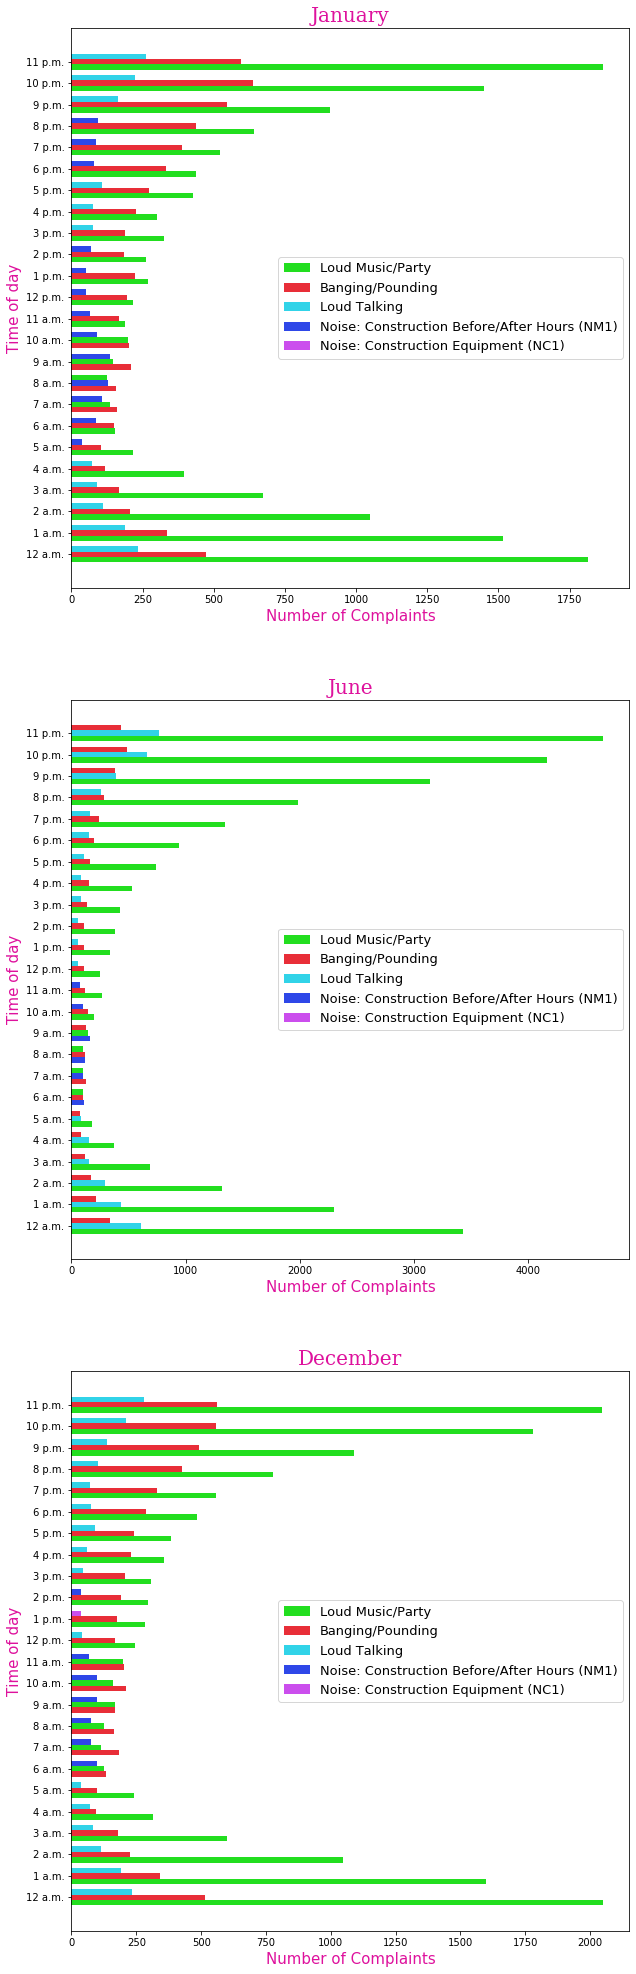

In [151]:
# Doing the plotting of the months separated into hours to 
# show what the top 3 noise disturbances are at each hour

searchLabel = ['12 a.m.', '1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
                   '12 p.m.', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.']

# Creating the colors for the barcharts
myColors = {"Banging/Pounding":"#e82e38", "Loud Music/Party":'#22de1f', 
            "Noise: Construction Before/After Hours (NM1)":'#2e47e8',
            "Loud Talking":"#31d3e8", "Noise: Construction Equipment (NC1)":"#cb4eed", 
            "Car/Truck Music":"#4a3f1d", 'Car/Truck Horn':"#edf50f" }

fig, (janAx, junAx, decAx) = plt.subplots(3, figsize=(10, 35))

#fig.suptitle("The Cause of Noise Disturbances per hour in the Following Months", fontdict=myfontdict)

# adding a title to each months
janAx.set_title("January", fontdict=myfontdict)
junAx.set_title("June", fontdict=myfontdict)
decAx.set_title("December", fontdict=myfontdict)

# setting the x values
xVals = np.arange(24)

janAx.set_yticks(xVals)
junAx.set_yticks(xVals)
decAx.set_yticks(xVals)

# setting the x tick labels
janAx.set_yticklabels(theHours)
junAx.set_yticklabels(searchLabel)
decAx.set_yticklabels(searchLabel)

# setting the x axis title
janAx.set_xlabel("Number of Complaints", fontdict={"color":"#de129d", 'size':15})
junAx.set_xlabel("Number of Complaints", fontdict={"color":"#de129d", 'size':15})
decAx.set_xlabel("Number of Complaints", fontdict={"color":"#de129d", 'size':15})


# setting the y axis title
janAx.set_ylabel("Time of day", fontdict={"color":"#de129d", 'size':15})
junAx.set_ylabel("Time of day", fontdict={"color":"#de129d", 'size':15})
decAx.set_ylabel("Time of day", fontdict={"color":"#de129d", 'size':15})
# the width of the bar
barWidth = .25

# dictionary to hold all the labels
legendDict = {}

# plotting the hours for January
# plotting first those most common
for i in range(24):
  janAx.barh(xVals[i] - barWidth, jan_descripVal1[i],  height=barWidth, color =myColors[jan_descripStr1[i]], label=jan_descripStr1[i])
  janAx.barh(xVals[i], jan_descripVal2[i], height=barWidth, color=myColors[jan_descripStr2[i]], label=jan_descripStr2[i])
  janAx.barh(xVals[i] + barWidth, jan_descripVal3[i],  height=barWidth, color =myColors[jan_descripStr3[i]], label=jan_descripStr3[i])

  junAx.barh(xVals[i] - barWidth, jun_descripVal1[i], height=barWidth, color=myColors[jun_descripStr1[i]], label=jun_descripStr1[i])
  junAx.barh(xVals[i] , jun_descripVal2[i], height=barWidth, color=myColors[jun_descripStr2[i]], label=jun_descripStr2[i])
  junAx.barh(xVals[i] + barWidth, jun_descripVal3[i], height=barWidth, color=myColors[jun_descripStr3[i]], label=jun_descripStr3[i])

 
  decAx.barh(xVals[i] - barWidth, dec_descripVal1[i], height=barWidth, color=myColors[dec_descripStr1[i]], label=dec_descripStr1[i])
  decAx.barh(xVals[i] , dec_descripVal2[i], height=barWidth, color=myColors[dec_descripStr2[i]], label=dec_descripStr2[i])
  decAx.barh(xVals[i] + barWidth, dec_descripVal3[i], height=barWidth, color=myColors[dec_descripStr3[i]], label=dec_descripStr3[i])


handles , labels = janAx.get_legend_handles_labels()
legendDict.update(zip(labels, handles))

handles, labels = junAx.get_legend_handles_labels()
legendDict.update(zip(labels, handles))

handles, labels = decAx.get_legend_handles_labels()
legendDict.update(zip(labels, handles))



# This is to remove the duplicate of the legend 
# because when we turn it into a dictionary it can't have duplicate keys
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys());

janAx.legend(legendDict.values(), legendDict.keys(), prop={"size":13})
decAx.legend(legendDict.values(), legendDict.keys(), prop={'size':13})
junAx.legend(legendDict.values(), legendDict.keys(), prop={'size':13});

In [152]:
# Combining the summer months and then putting separting by hour
# so that I can see if it changes with three months combined.  Summer
# months will be considered as "June, July, August"
data_by_month

summerMonths = pd.concat([data_by_month[5], data_by_month[6], data_by_month[7]], ignore_index=True)
summerMonths.sample(5)

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
92672,2017-08-01 23:37:32,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,222 WEST 233 STREET
54393,2017-07-04 20:40:07,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,1296 PACIFIC STREET
89034,2017-07-30 04:52:15,Noise - Residential,Loud Music/Party,Residential Building/House,100-16 201 STREET
126891,2017-08-26 23:38:08,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN
214,2017-06-01 03:45:37,Noise - Residential,Banging/Pounding,Residential Building/House,83-96 118 STREET


In [153]:
summerMonths_by_hour = getDatabyHour(summerMonths, broken_by_month=False)
summerMonths_by_hour[0].head(2)

,Created Date,Complaint Type,Descriptor,Location Type,Incident Address
0,2017-06-01 00:00:40,Noise - Residential,Loud Music/Party,Residential Building/House,156-02 111 AVENUE
1,2017-06-01 00:00:59,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,185 YORK STREET


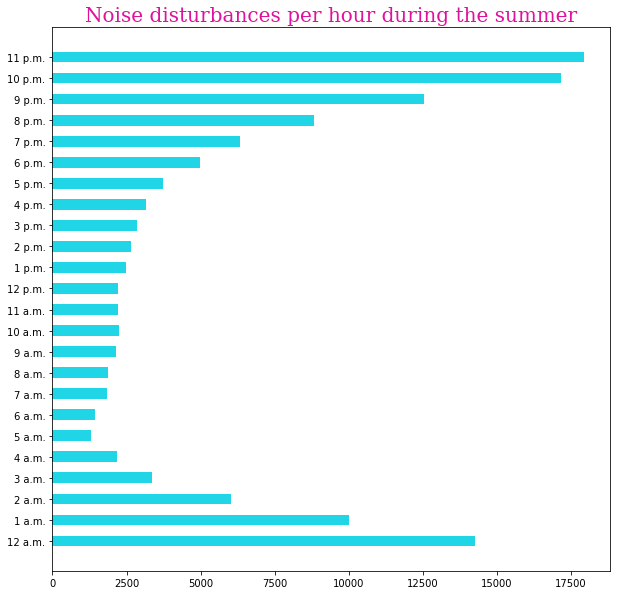

In [154]:
# Will graph to see the hours that are the noisiest during the summer
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title("Noise disturbances per hour during the summer", fontdict=myfontdict)

# Setting the y ticks
yVals = np.arange(24)
ax.set_yticks(yVals)
ax.set_yticklabels(theHours)

theBarWidth = .5

for i in range(24):
  ax.barh(yVals[i], len(summerMonths_by_hour[i].index), height=theBarWidth, color="#20d5e6" )

# Following certain descriptors during the Month of June.
Watching the amount change of 11 of the most common noise complaints throughout the day.

In [0]:
# Getting the June broken up by hour
june_by_hour = getDatabyHour(data_by_month[5], broken_by_month=False)

In [0]:
# Getting the values of the following during each hour in June

#Loud Music/Party                                         243008
#Banging/Pounding                                          66450
#Loud Talking                                              41736
#Noise: Construction Before/After Hours (NM1)              27324
#Car/Truck Music                                           16695
#Noise: Construction Equipment (NC1)                        9149
#Car/Truck Horn                                             7376
#Engine Idling                                              7351
#Noise, Barking Dog (NR5)                                   6916
#Noise: air condition/ventilation equipment (NV1)           4769
#Loud Television                                            4142

descriptorsWant = ["Loud Music/Party", "Banging/Pounding", "Loud Talking", "Noise: Construction Before/After Hours (NM1)",
                   'Car/Truck Music', "Noise: Construction Equipment (NC1)","Car/Truck Horn", 
                   "Engine Idling","Noise, Barking Dog (NR5)", "Noise: air condition/ventilation equipment (NV1)",
                   "Loud Television"]
theValues = mostCommonCause(june_by_hour, theType='hour', descriptorsWanted=descriptorsWant)

In [157]:
theValues

[('12 a.m.',
  ['Loud Music/Party',
   'Banging/Pounding',
   'Loud Talking',
   'Noise: Construction Before/After Hours (NM1)',
   'Car/Truck Music',
   'Noise: Construction Equipment (NC1)',
   'Car/Truck Horn',
   'Engine Idling',
   'Noise, Barking Dog (NR5)',
   'Noise: air condition/ventilation equipment (NV1)',
   'Loud Television'],
  [3430, 342, 605, 150, 268, 8, 40, 43, 13, 24, 34]),
 ('1 a.m.',
  ['Loud Music/Party',
   'Banging/Pounding',
   'Loud Talking',
   'Noise: Construction Before/After Hours (NM1)',
   'Car/Truck Music',
   'Noise: Construction Equipment (NC1)',
   'Car/Truck Horn',
   'Engine Idling',
   'Noise, Barking Dog (NR5)',
   'Noise: air condition/ventilation equipment (NV1)',
   'Loud Television'],
  [2299, 211, 434, 127, 172, 4, 21, 24, 10, 20, 19]),
 ('2 a.m.',
  ['Loud Music/Party',
   'Banging/Pounding',
   'Loud Talking',
   'Noise: Construction Before/After Hours (NM1)',
   'Car/Truck Music',
   'Noise: Construction Equipment (NC1)',
   'Car/Truck H

In [0]:
# This is a method that will built the list of values from just one of the descriptor
# string types
# Will return a tuple (descriptorString , hourList, valueList)
def getDescValue(someNumber, values):
  '''
    someNumber:  this is the integer to acess the elememnt in the list of descriptor strings

    values:  this is the list that has the all the values in a list of tuples as above

    returns:  will return a tuple of(descriptorString, hourList, valueList)
    '''
  hourList = []
  valueList = []
  for tup in values:
    hourList.append(tup[0])
    valueList.append(tup[2][someNumber])
  return (values[0][1][someNumber], hourList, valueList)  

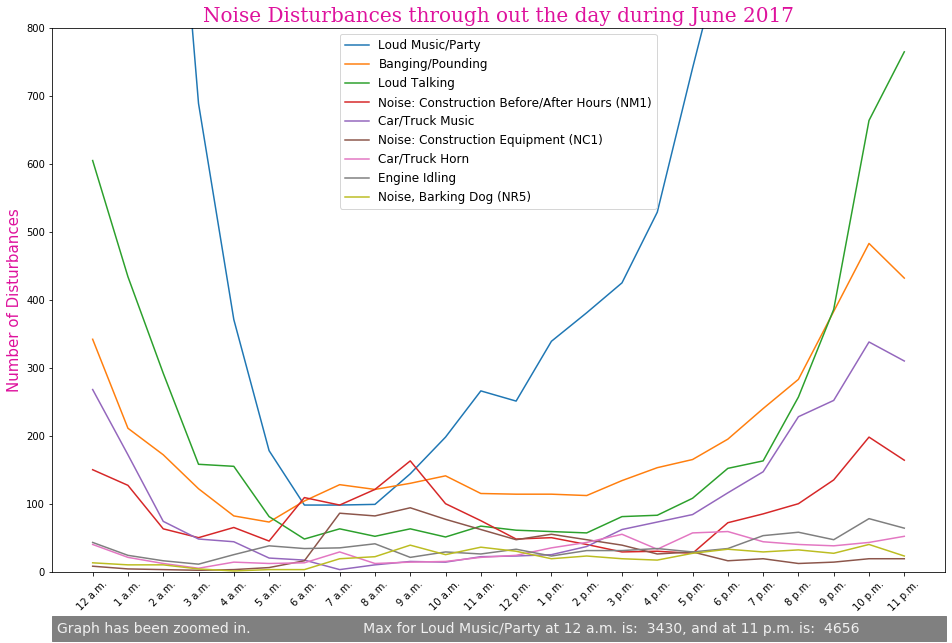

In [159]:
# Graphing the data of each value per hour

fig, ax = plt.subplots(figsize=(16, 10))

# Setting x ticks 
xVals = np.arange(24)
plt.xticks(xVals, rotation="45")
ax.set_xticklabels(theHours)

# Setting the y ticks
ax.set_ylabel("Number of Disturbances", fontdict={"color":"#de129d", 'size':15})

# Setting the Title
ax.set_title("Noise Disturbances through out the day during June 2017", fontdict=myfontdict)

# Setting up the plot. Going through the descriptors
for i in range(9):
  descriptor, hourList, valList = getDescValue(i, theValues)
  ax.plot(hourList, valList, label=descriptor)


# zooming in to see some of the crowded values more easily
ax.set_ylim(bottom=0, top=800, auto=False, )

# adding some text to the bottom of the  graph
plt.text(x=-1, y=-90, s="Graph has been zoomed in.                         Max for Loud Music/Party at 12 a.m. is:  3430, and at 11 p.m. is:  4656                  ", 
        backgroundcolor = 'grey', color="#f0f0f0", size="14")

# prop is to change some of the properties of the legend.
# Changing the size so that it can be seen better in the Medium article 
ax.legend(prop={'size':12}); 